# K Nearest Neighbor Machine Learning (KNN)
In this notebook, we explore how to build and optimize a KNN machine learning model that aims to predict the price of a car given its features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Read the data into a dataframe with the headers
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df = pd.read_csv('imports-85.data', names=cols)

In [3]:
### show the first five rows of the dataframe
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Filtering Numeric and Categorical Values

In [4]:
### Choosing continuous values from the attributes description of the data https://archive.ics.uci.edu/ml/datasets/automobile
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                          'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 
                          'highway-mpg', 'price']
df_continuous = df[continuous_values_cols]
df_continuous.head()


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


there are '?' in some columns of the table above. We need to change that into nan.

In [5]:
df_categorical = df[[x for x in df.columns if x not in continuous_values_cols]]
df_categorical.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,engine-size,fuel-system
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,152,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,109,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,136,mpfi


### Data Cleaning

In [6]:
### replacing '?' with nan
df_continuous = df_continuous.replace('?', np.nan)
df_continuous.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
### transform all the values into float type
df_continuous = df_continuous.astype(float)
df_continuous.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Let's drop the missing values in the price columns since we are aiming to predict that.

In [8]:
df_continuous.dropna(subset=['price'])

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.00,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.00,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.00,115.0,5500.0,18.0,22.0,17450.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,15250.0
6,158.0,105.8,192.7,71.4,55.7,2844.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,17710.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,18920.0
8,158.0,105.8,192.7,71.4,55.9,3086.0,3.13,3.40,8.30,140.0,5500.0,17.0,20.0,23875.0
10,192.0,101.2,176.8,64.8,54.3,2395.0,3.50,2.80,8.80,101.0,5800.0,23.0,29.0,16430.0


There are missing values in 6 columns of the table. Let's fill them with their mean values.

In [9]:

df_continuous = df_continuous.fillna(df_continuous.mean())

In [10]:
df_continuous

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,13495.000000
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,16500.000000
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.00,154.0,5000.0,19.0,26.0,16500.000000
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.00,102.0,5500.0,24.0,30.0,13950.000000
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.00,115.0,5500.0,18.0,22.0,17450.000000
5,122.0,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,15250.000000
6,158.0,105.8,192.7,71.4,55.7,2844.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,17710.000000
7,122.0,105.8,192.7,71.4,55.7,2954.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,18920.000000
8,158.0,105.8,192.7,71.4,55.9,3086.0,3.13,3.40,8.30,140.0,5500.0,17.0,20.0,23875.000000
9,122.0,99.5,178.2,67.9,52.0,3053.0,3.13,3.40,7.00,160.0,5500.0,16.0,22.0,13207.129353


### Normalization
Since KNN trains the model based on the numeric values of the features. A feature with much higher value scale (for example 100-200) will have much heavier impact than one with lower value scale( 1-10). Thus, we need to normalize them to appease the effect of the high value scale feature.

In [11]:
### subtract the mean from each column and divide them by their standard deviation 
### values. We don't need to standardize our target so let's seperate it.
price = df_continuous['price'].copy()
df_continuous = (df_continuous - df_continuous.mean()) / df_continuous.std()

In [12]:
### turn the table's price column back to its old values
df_continuous['price'] = price

### Univariate model
There are two ways to improve the performance of a KNN machine learning model:
- One is to select the appropriate features. This is called feature selection
- The other is to select the best k-values(the number of neighbors). This is called hyperparameter optimization 

Let's explore the second option.

#### Univariate model with default k-value = 5

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import numpy as np
### create a function that create a knn which trains on each feature of the data 
### with train and test sets ratio of 0.5

def knn_train_test(df, train_column):
    X_train, X_test, y_train, y_test = train_test_split(df[[train_column]], df[['price']],
                                                        test_size =0.5, random_state = 42)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    rmse = np.sqrt(mse(y_test, predictions))
    
    return rmse


RMSE score gives the overall performance of a KNN model. RMSE score shows how much, in average, the prediction is off in comparison with the actual price.

In [30]:
### return the rmse score of each feature in ascending order
dict1 = {}

train_cols = df_continuous.columns.drop('price')
for x in train_cols:
        rmse = knn_train_test(df_continuous, x)
        dict1[x] = rmse
       
rmse_results = pd.Series(dict1)
print('rmse score for each feature:\n\n', rmse_results.sort_values())

rmse score for each feature:

 horsepower           3578.563740
curb-weight          4515.663917
highway-mpg          4691.038138
city-mpg             4866.369395
width                4937.169751
length               5154.331926
compression-rate     5641.986581
wheel-base           5701.068476
bore                 5922.955374
stroke               6736.590567
normalized-losses    7056.564285
peak-rpm             7253.362039
height               7289.821576
dtype: float64


The result shows that horspower plays the most important role in determining the price of a car with an error of approximately $3578 from the actual price. Can we do better than this model? Let's try out different combinations of k-values.

#### Univariate model with varying k-values

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import numpy as np
### create a function that create a knn which trains on each feature of the data 
### with train and test sets ratio of 0.5

def knn_train_test1(df, train_column):
    X_train, X_test, y_train, y_test = train_test_split(df[[train_column]], df[['price']],
                                                        test_size =0.5, random_state = 42)
    ### train the model with the number of neighbors corresponding to the values
    ### in k_values
    k_values = [1,3,5,7,9]
    k_rmses = {}
    for j in k_values:
        knn = KNeighborsRegressor(n_neighbors = j)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        rmse = np.sqrt(mse(y_test, predictions))
        k_rmses[j] = rmse
    ### return a dictionary that contains k value with its corresponding rmse
    return k_rmses

### return the rmse score of each feature together with the number of neighbors
### in ascending order
k_rmses_results = {}

train_cols = df_continuous.columns.drop('price')
for x in train_cols:
    rmse = knn_train_test1(df_continuous, x)
    k_rmses_results[x] = rmse

k_rmses_results

{'bore': {1: 7423.304660397365,
  3: 5895.782726132145,
  5: 5922.9553737091965,
  7: 6124.075618281695,
  9: 5887.674358261025},
 'city-mpg': {1: 5258.977116043157,
  3: 4773.050965065576,
  5: 4866.369395073268,
  7: 4971.843572852877,
  9: 4974.2337156098965},
 'compression-rate': {1: 7247.637180311905,
  3: 6159.52048723952,
  5: 5641.986581308349,
  7: 5866.663308378892,
  9: 6074.161457186103},
 'curb-weight': {1: 5569.534758487353,
  3: 4954.935455069239,
  5: 4515.6639172063105,
  7: 4457.821597116143,
  9: 4513.0611460979},
 'height': {1: 8054.635992410374,
  3: 7959.28760929181,
  5: 7289.821576245555,
  7: 7166.2390416784665,
  9: 7347.313803872711},
 'highway-mpg': {1: 5844.080453579278,
  3: 4864.216862192116,
  5: 4691.038137766454,
  7: 4747.84656227882,
  9: 4779.076086327056},
 'horsepower': {1: 4074.293307073812,
  3: 3558.0305073199947,
  5: 3578.5637396877664,
  7: 4011.372444442449,
  9: 4295.116982528722},
 'length': {1: 5254.702149474795,
  3: 4752.998943124795,


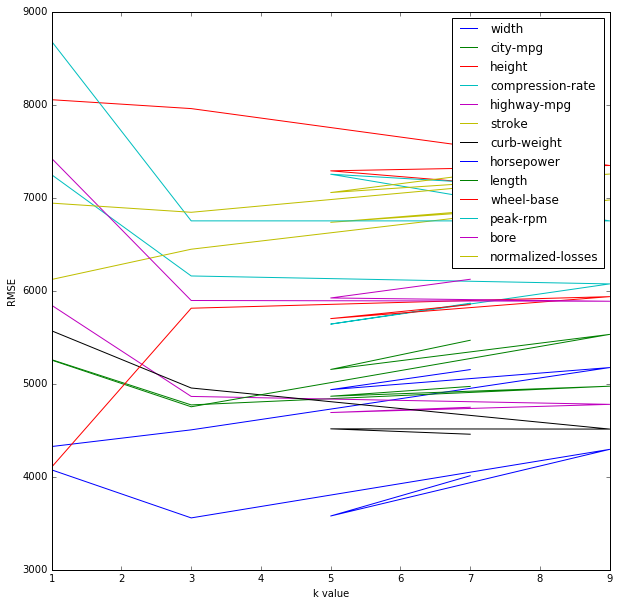

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
for k,v in k_rmses_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label =k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend()
    

The plot shows that the model of horsepower with k-values of 3 and 5 give the best performances. Unfortunately, in real life, there are more than just horsepower that determine the price of a car. Let's explore a model with more than one feature.


In [16]:
### calculate the average rmse score for each univariate model
feature_avg_rmse = {}
for k,v in k_rmses_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           3903.475396
curb-weight          4802.203375
width                4818.952215
city-mpg             4968.894953
highway-mpg          4985.251620
length               5232.283548
wheel-base           5481.502345
compression-rate     6197.993803
bore                 6250.758547
stroke               6624.845307
normalized-losses    7069.166589
peak-rpm             7320.922441
height               7563.459605
dtype: float64

### Multivariate model
Let's explore our first option which is feature selection.

In [17]:
def knn_train_test2(df, train_column):
    X_train, X_test, y_train, y_test = train_test_split(df[train_column], df[['price']],
                                                        test_size =0.5, random_state = 42)
    ### train the model with the number of neighbors corresponding to the values
    ### in k_values
    k_values = list(range(1,25))
    k_rmses = {}
    for j in k_values:
        knn = KNeighborsRegressor(n_neighbors = j)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        rmse = np.sqrt(mse(y_test, predictions))
    ### return a dictionary that contains k value with its corresponding rmse
        
        k_rmses[j] = rmse
    return k_rmses

### return the rmse score of each feature together with the number of neighbors
### in ascending order
k_rmse_results = {}

train_cols = df_continuous.columns.drop('price')

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test2(df_continuous, two_best_features)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test2(df_continuous, three_best_features)
k_rmse_results["three_best_features"] = rmse_val
four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test2(df_continuous, four_best_features)
k_rmse_results["four_best_features"] = rmse_val
five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test2(df_continuous, five_best_features)
k_rmse_results["five_best_features"] = rmse_val
six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test2(df_continuous, six_best_features)
k_rmse_results["six_best_features"] = rmse_val

k_rmse_results

{'five_best_features': {1: 3505.2821631917786,
  2: 3627.481225134181,
  3: 3911.158538755765,
  4: 4039.166963566678,
  5: 4293.982542819776,
  6: 4336.735911747005,
  7: 4429.494057624472,
  8: 4455.228232989247,
  9: 4552.677993259782,
  10: 4461.634720993742,
  11: 4440.590048706979,
  12: 4396.918488822623,
  13: 4317.1130733680975,
  14: 4298.100555851393,
  15: 4282.748595822463,
  16: 4297.291324551959,
  17: 4293.430594904446,
  18: 4330.833292981091,
  19: 4348.23162804579,
  20: 4397.00183272666,
  21: 4428.365757314502,
  22: 4491.206441862717,
  23: 4529.433986964938,
  24: 4598.798194694223},
 'four_best_features': {1: 3465.1143041287705,
  2: 3507.0458863697313,
  3: 3749.0911513743667,
  4: 3925.910966201727,
  5: 4099.558169233217,
  6: 4147.740522029711,
  7: 4272.384313190318,
  8: 4361.224293477265,
  9: 4444.178208282476,
  10: 4348.219670603262,
  11: 4280.188493057994,
  12: 4266.650861005945,
  13: 4244.362613992894,
  14: 4340.394288894551,
  15: 4276.565153389

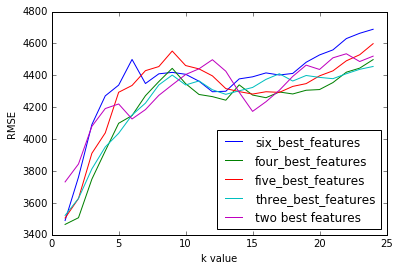

In [18]:
### plotting the results
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(loc = 'lower right')

The graph shows that as k-value increases, the rmse scores increases. The best model is the four_best_features model with k-value of 1.

### Conclusion

In this notebook, we explore how to build a KNN machine learning model to predict the car prices based on their features. We also explore how we can improve the model's performance through feature selection and hyperparameter optimization. We see that the model with four features 'horsepower', 'width', 'curb-weight', 'city-mpg' give the best performance in predicting the price of a car with an error of approximately $3465 from the actual price on average. 